In [1]:
import pandas as pd 
import numpy as np 
import scipy.stats as st 
from scipy.interpolate import interp1d
from matplotlib import pyplot as plt 
import math
import statistics as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures 

In [2]:
data=pd.read_csv('measerr_scale_U.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]
w=data.iloc[:,1]
x=data.iloc[:,2]
z=data.iloc[:,3]

print(stats.stdev(x))
print(data)

0.3851347117143673
           A         B         C        D
0   1.195859  0.196453  45.48131  0.00300
1   1.170506  0.205177  44.56355  0.01184
2   1.032013  0.157972  44.48522  0.01201
3   0.917479  0.147812  44.94271  0.00330
4   0.877315  0.139783  44.85158  0.01119
..       ...       ...       ...      ...
65  1.032091  0.187493  45.16544  0.00446
66  1.160881  0.194522  44.73836  0.01216
67  0.993321  0.153457  44.70017  0.01567
68  1.043746  0.162104  44.99169  0.00923
69  1.082587  0.167039  45.37277  0.00411

[70 rows x 4 columns]


pendiente b1  -0.08505060982300386
intercepción b0 is 4.912094278903922


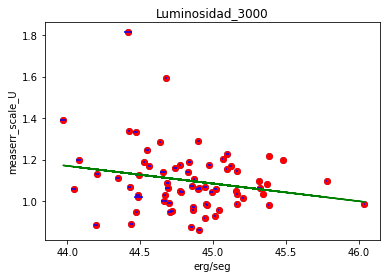

In [3]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_3000")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('measerr_scale_U')
plt.savefig("Luminosidad_3000_measerr_scale_U.pdf")

In [5]:
x=np.array(data.iloc[:,2:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)

Pendiente : [[-0.08505061]
 [-0.01222529]
 [ 1.        ]]
Intercepción: [4.91209428e+00 7.30603651e-01 7.10542736e-15]
Errorcuadratico medio : 0.0078130735413692
Raiz del error cuadratico medio:  0.08839159202870599
 Coeficiente de determinacion R2 :  0.3600027315981787


In [6]:
data=pd.read_csv('measerr_scale_G.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]
w=data.iloc[:,1]
x=data.iloc[:,2]
z=data.iloc[:,3]

print(stats.stdev(x))
print(data)

0.36689463145650586
           A         B         C        D
0   1.041636  0.220427  45.48131  0.00300
1   1.022801  0.219710  44.56355  0.01184
2   1.115778  0.188678  44.48522  0.01201
3   0.917479  0.147812  44.94271  0.00330
4   0.877315  0.139783  44.85158  0.01119
..       ...       ...       ...      ...
76  1.113626  0.253562  44.47789  0.01137
77  1.009048  0.184411  45.01247  0.01123
78  1.138252  0.176201  44.55196  0.01556
79  1.171940  0.198775  44.98618  0.00803
80  1.238977  0.197372  45.06799  0.01807

[81 rows x 4 columns]


pendiente b1  -0.0036352767484669354
intercepción b0 is 1.297671139906822


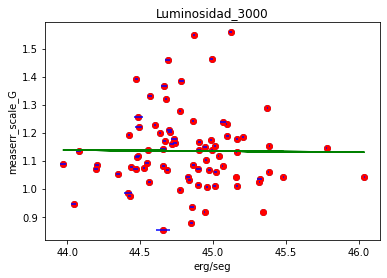

In [7]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_3000")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('measerr_scale_G')
plt.savefig("Luminosidad_3000_measerr_scale_G.pdf")

In [8]:
x=np.array(data.iloc[:,2:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)

Pendiente : [[-3.63527675e-03]
 [-8.30365630e-04]
 [ 1.00000000e+00]]
Intercepción: [1.29767114 0.25172661 0.        ]
Errorcuadratico medio : 0.00670746568079893
Raiz del error cuadratico medio:  0.08189911892565713
 Coeficiente de determinacion R2 :  0.33339355208904986


In [9]:
data=pd.read_csv('measerr_scale_R.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]

x=data.iloc[:,1]
z=data.iloc[:,2]
print(stats.stdev(x))
print(stats.stdev(y))
print(data)

0.3606475277861541
0.1771718525435939
           A         B        C
0   1.142239  45.48131  0.00300
1   1.052054  44.56355  0.01184
2   1.153307  44.48522  0.01201
3   1.214880  44.94271  0.00330
4   1.410062  44.85158  0.01119
..       ...       ...      ...
79  1.289388  44.98618  0.00803
80  1.084152  45.06799  0.01807
81  1.323335  44.86777  0.01203
82  1.124980  44.71317  0.02774
83  1.193282  44.93590  0.01085

[84 rows x 3 columns]


pendiente b1  -0.02068981115952054
intercepción b0 is 2.0641415498965907


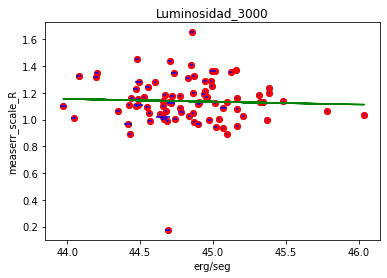

In [10]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_3000")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('measerr_scale_R')
plt.savefig("Luminosidad_3000_measerr_scale_R.pdf")

In [12]:
x=np.array(data.iloc[:,1:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)

Pendiente : [[-0.02068981]
 [ 1.        ]]
Intercepción: [2.06414155 0.        ]
Errorcuadratico medio : 0.015480580941806174
Raiz del error cuadratico medio:  0.12442098272319735
 Coeficiente de determinacion R2 :  0.500886869101447


In [13]:
data=pd.read_csv('measerr_scale_I.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]

x=data.iloc[:,1]
z=data.iloc[:,2]

print(stats.stdev(x))
print(stats.stdev(y))

print(data)

0.3606475277861541
0.15315518197491781
           A         C        D
0   1.133457  45.48131  0.00300
1   1.160523  44.56355  0.01184
2   1.067083  44.48522  0.01201
3   1.167257  44.94271  0.00330
4   1.147959  44.85158  0.01119
..       ...       ...      ...
79  1.509390  44.98618  0.00803
80  1.316358  45.06799  0.01807
81  1.288756  44.86777  0.01203
82  0.968654  44.71317  0.02774
83  1.077684  44.93590  0.01085

[84 rows x 3 columns]


pendiente b1  -0.05847940602582136
intercepción b0 is 3.814748229322243


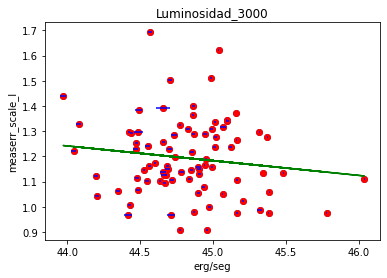

In [14]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_3000")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('measerr_scale_I')
plt.savefig("Luminosidad_3000_measerr_scale_I.pdf")

In [15]:
x=np.array(data.iloc[:,1:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)

Pendiente : [[-0.05847941]
 [ 1.        ]]
Intercepción: [3.81474823 0.        ]
Errorcuadratico medio : 0.011368876854656151
Raiz del error cuadratico medio:  0.10662493542626955
 Coeficiente de determinacion R2 :  0.5094815303092481


In [16]:
data=pd.read_csv('measerr_scale_Z.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]

x=data.iloc[:,1]
z=data.iloc[:,2]
print(stats.stdev(x))
print(stats.stdev(y))
print(data)

0.370065930953986
0.1534460963670065
           A         B        C
0   1.128665  45.48131  0.00300
1   0.928674  44.56355  0.01184
2   1.128355  44.48522  0.01201
3   1.291580  44.94271  0.00330
4   0.993960  44.85158  0.01119
..       ...       ...      ...
74  1.113575  44.59963  0.00717
75  1.195405  44.73006  0.02122
76  1.072265  44.47789  0.01137
77  1.027135  45.01247  0.01123
78  1.103926  44.55196  0.01556

[79 rows x 3 columns]


pendiente b1  -0.10817326755679411
intercepción b0 is 5.992555410541069


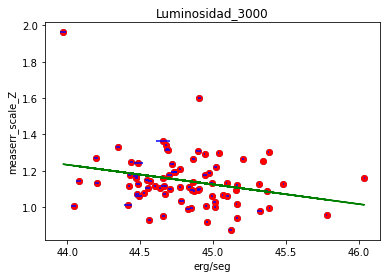

In [17]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_3000")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('measerr_scale_Z')
plt.savefig("Luminosidad_3000_measerr_scale_Z.pdf")

In [18]:
x=np.array(data.iloc[:,1:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)

Pendiente : [[-0.10817327]
 [ 1.        ]]
Intercepción: [ 5.99255541e+00 -7.10542736e-15]
Errorcuadratico medio : 0.01083272107913987
Raiz del error cuadratico medio:  0.10408035875774002
 Coeficiente de determinacion R2 :  0.5340295669153294
